# GNB - Gaussian Naive Bayes
A Gaussian Naive Bayes Classifier, with default parameter values.

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

from utils import config, ProcessDataset,model_utils
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

## Loading Latin and Greek train and val data.

The data consists of 1025 columns, 1024 columns for each pixel and 1 row specifying the character it represents.
+ Calling helper method to load the dataset of training and validating

In [2]:
Latin_X_Train, Latin_Y_Train, Latin_X_Val, Latin_Y_Val = ProcessDataset.get_Latin_Train_Val()
Greek_X_Train, Greek_Y_Train, Greek_X_Val, Greek_Y_Val = ProcessDataset.get_Greek_Train_Val()

### Training the GNB model

In [3]:
clf_latin = GaussianNB()
clf_latin.fit(Latin_X_Train, Latin_Y_Train)

clf_greek = GaussianNB()
clf_greek.fit(Greek_X_Train, Greek_Y_Train)

GaussianNB()

### Validating the model with K-Fold Cross-validation

In [4]:
kfold = KFold(n_splits=10, random_state=100)

results_kfold = cross_val_score(clf_latin, Latin_X_Val, Latin_Y_Val, cv=kfold)
print("Accuracy of latin: %.2f%%" % (results_kfold.mean()*100.0)) 

results_kfold = cross_val_score(clf_greek, Greek_X_Val, Greek_Y_Val, cv=kfold)
print("Accuracy of greek: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy of latin: 39.87%
Accuracy of greek: 64.98%


## Test the models
### Load the test datasets

In [5]:
Latin_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_NOLABEL))
Latin_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_LABEL))[:,1024]

Greek_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_NOLABEL))
Greek_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_LABEL))[:,1024]

### Make prediction and export results to `csv` files

In [6]:
Latin_Y_Pred = clf_latin.predict(Latin_X_Test)
pd.DataFrame(Latin_Y_Pred).to_csv("./Output/GNB-DS1.csv", header=None)

Greek_Y_Pred = clf_greek.predict(Greek_X_Test)
pd.DataFrame(Greek_Y_Pred).to_csv("./Output/GNB-DS2.csv", header=None)

## Assert the accuracy of the models:

### 1. Confusion Matrix

#### Latin Character Predicition Model:

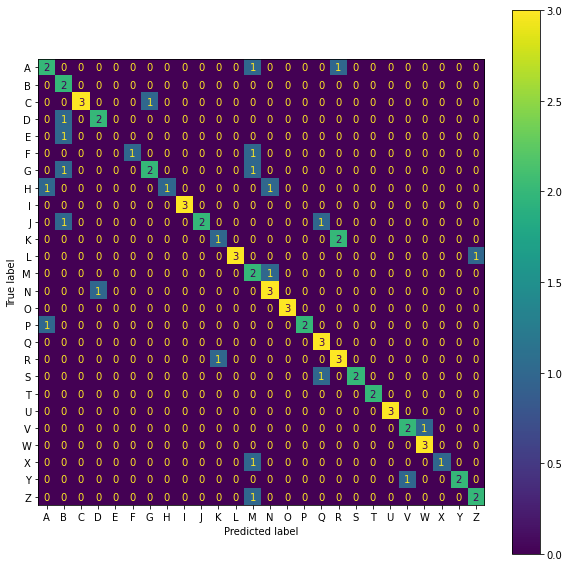

In [7]:
model_utils.show_confusion_matrix(clf_latin, Latin_X_Test, Latin_Y_Test, isGreekLetter=False)

#### Greek Character Prediction Model:

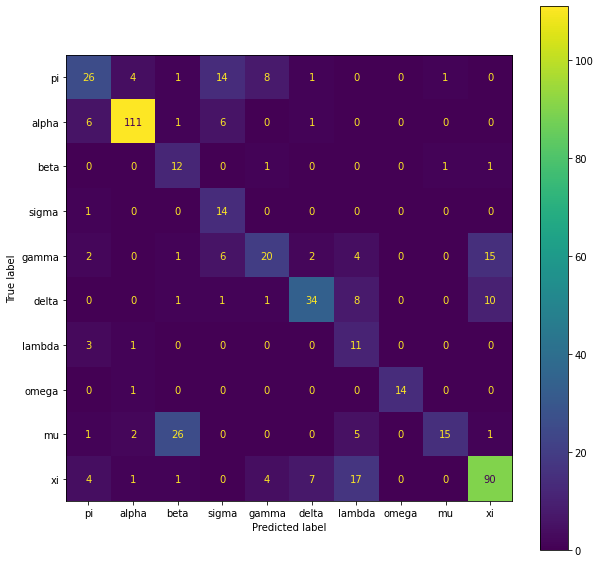

In [8]:
model_utils.show_confusion_matrix(clf_greek, Greek_X_Test, Greek_Y_Test, isGreekLetter=True)

### 2. Precision, recall, and f1-measure for each class

#### Latin Character Prediciton Model:

In [9]:
model_utils.calculate_PRF(Latin_Y_Test, Latin_Y_Pred)

,precision,recall,f1
0,0.500000,0.500000,0.500000
1,0.333333,1.000000,0.500000
2,1.000000,0.750000,0.857143
3,0.666667,0.666667,0.666667
4,0.000000,0.000000,0.000000
5,1.000000,0.500000,0.666667
6,0.666667,0.500000,0.571429
7,1.000000,0.333333,0.500000
8,1.000000,1.000000,1.000000
9,1.000000,0.500000,0.666667


#### Greek Character Prediction Model:

In [10]:
model_utils.calculate_PRF(Greek_Y_Test, Greek_Y_Pred)

,precision,recall,f1
0,0.604651,0.472727,0.530612
1,0.925000,0.888000,0.906122
2,0.279070,0.800000,0.413793
3,0.341463,0.933333,0.500000
4,0.588235,0.400000,0.476190
5,0.755556,0.618182,0.680000
6,0.244444,0.733333,0.366667
7,1.000000,0.933333,0.965517
8,0.882353,0.300000,0.447761
9,0.769231,0.725806,0.746888


### 3. Accuracy, macro-average f1 and weighted-average f1 of the model

#### GNB model on DS1 - Latin characters

In [11]:
print("Accuracy of GNB model on DS1: " + str(accuracy_score(Latin_Y_Test, Latin_Y_Pred) * 100) + "%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of GNB model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of GNB model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='weighted')*100)+"%")

Accuracy of GNB model on DS1: 69.62025316455697%
Macro-average f1 of GNB model on DS1: 68.69047619047619%
Weighted-average f1 of GNB model on DS1: 70.20795660036167%


#### Base-DT model on DS2 - Greek characters

In [12]:
print("Accuracy of GNB model on DS2: " + str(accuracy_score(Greek_Y_Test, Greek_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of GNB model on DS2: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of GNB model on DS2: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='weighted')*100)+"%")

Accuracy of GNB model on DS2: 66.85934489402698%
Macro-average f1 of GNB model on DS2: 60.3355134239711%
Weighted-average f1 of GNB model on DS2: 67.89023625415882%
